<a href="https://colab.research.google.com/github/oksuzian/Mu2eANL/blob/master/Wideband/WidebandAna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%pip -q install uproot3
%pip -q install --upgrade tables
import uproot3

     |████████████████████████████████| 117 kB 7.1 MB/s 
     |████████████████████████████████| 87 kB 1.6 MB/s 


In [2]:
plt.style.use('seaborn-whitegrid')
plt.rcParams["grid.linestyle"] = (5,15)
plt.rcParams["grid.linewidth"] = 0.7
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams.update({'font.size': 22})

In [3]:
try:
    from google.colab import drive
    drive.mount("/content/drive")
    main_path = '/content/drive/MyDrive/'
except:
    main_path = ''
sys.path.append(main_path)

Mounted at /content/drive


In [4]:
root_file = 'drive/MyDrive/Wideband/crv.reco.wideband_cosmics_crvaging-001.run96.root'
uproot_file = uproot3.open(root_file)
uproot_tree = uproot_file["run0096"]

In [16]:
df = uproot_tree.pandas.df(['PEs', 'timeSinceSpill', 'spillNumber', 'eventNumber'], flatten=True)

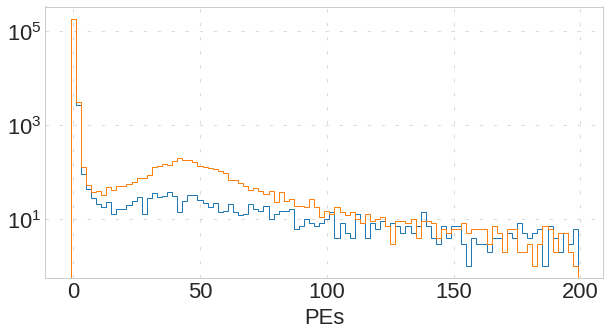

In [198]:
plt.hist(df['PEs[0][63]'], histtype='step', bins=100, range=(-1, 199));
plt.hist(df['PEs[1][63]'], histtype='step', bins=100, range=(-1, 199));
plt.xlabel('PEs')
plt.yscale('log')

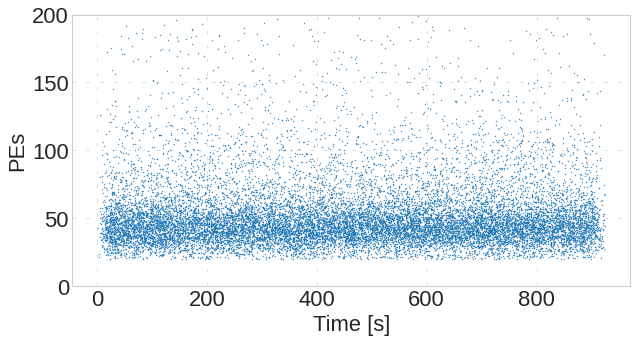

In [7]:
df_cut = df.loc[df['PEs[0][0]']>20]
plt.plot(df_cut['spillNumber'] + df_cut['timeSinceSpill[0][0]']/1e9, df_cut['PEs[0][0]'], '.', markersize=0.8)
plt.ylim(0,200)
plt.ylabel('PEs')
plt.xlabel('Time [s]');

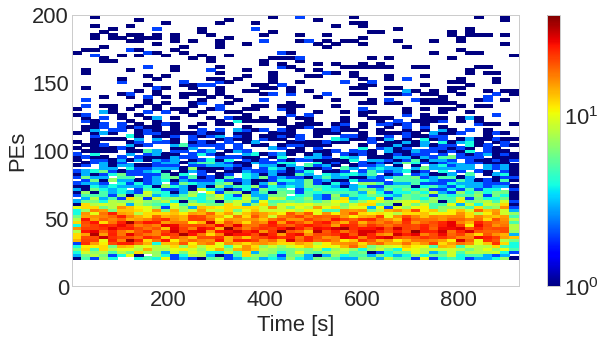

In [8]:
plt.hist2d(df_cut['spillNumber'] + df_cut['timeSinceSpill[0][0]']/1e9, df_cut['PEs[0][0]'], bins=(50,300), norm=matplotlib.colors.LogNorm(), cmap=plt.cm.jet);
plt.ylim(0,200)
plt.colorbar()
plt.ylabel('PEs')
plt.xlabel('Time [s]');

1

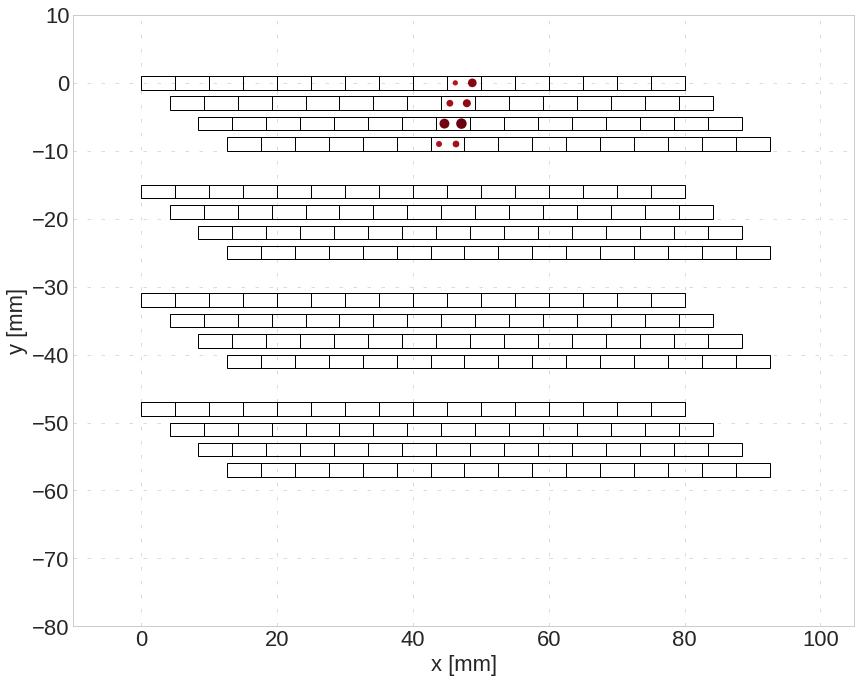

In [197]:
vmax=75
norm = matplotlib.colors.LogNorm(vmin=2, vmax=vmax)
m = cm.ScalarMappable(norm=norm, cmap=plt.cm.Reds)
#m = cm.ScalarMappable(norm=norm, cmap=plt.cm.viridis)

df_ = df.query('spillNumber==1 and eventNumber==10')

num_modules=4
xy=[]
for x in range(0,15):
  for y in range(0,4):
    for n in range(0,num_modules):
      xy.append([5*x+4.2*y,-y*3-n*16])

fig, axs = plt.subplots(1,1, figsize=(14,14))
axs.set_aspect(aspect='equal')
axs.set_xlim(-10, 105)
axs.set_ylim(-80, 10)
axs.set_ylabel("y [mm]")
axs.set_xlabel("x [mm]")
for x, y in xy:
    rect1 = plt.Rectangle((x, y-1), 10, 2, fill=None)
    axs.add_patch(rect1)


for feb in range(0,2):
  for chan in range(0,64):
    layer=feb*2+chan//32
    chanLayer = chan%32

    y = -layer*3
    x = 2.5*chanLayer+4.2*layer

    if feb==0:
      feb_=1
    else:
      feb_=0

    z = df_['PEs[%d][%d]'%(feb_,chan)].iloc[0]
    z = np.clip(z, 0.1, vmax)
#    rect = plt.Rectangle((x+0.5, y-1), 1.5, 2, fc=m.to_rgba(z))
    rect = plt.Circle((x+1.25, y), 0.8*z/vmax, fc=m.to_rgba(z))
    axs.add_patch(rect)